<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/DeepLearning3_RNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO 1**

## Moving Average (MA):
Es un modelo usado en series de tiempo y aprendizaje automático. Se representa como:

$X_{t}=𝜇+ϵ_{t}+θ_{1}ϵ_{t-1}+θ_{2}ϵ_{t-2}+...+θ_{q}ϵ_{t-q}$

Donde:

* $X_{t}$: Valor observado de la serie en el tiempo 't'
* $𝜇$: Medida de la serie
* $ϵ_{t}$: Ruido blanco (Error aleatorio con media 0 y varianza constante)
* $θ_{1}...θ_{q}$: Parámetros del modelo MA
* q: Orden del modelo (Cuántos errores pasados se usan)

De esto se puede sacar una conclusión directa y sencilla: ***La observación actual depende linealmente de los errores en los pasos anteriores***


---

Su principio de optimización se basa en minimizar el error cuadrático medio (MSE) entre los valores observados y los predichos, por lo que se ajustan los parámetros $θ_{i}$ y $𝜇$ para que:

$\min_{\substack{𝜇,θ_1...θ_q}}∑_t(X_t-\widehat{X}_t)^2$

Con $\widehat{X}_t=𝜇+θ_{1}ϵ_{t-1}+...+θ_{q}ϵ_{t-q}$

Como los errores $ϵ_t$ dependen de los parámetros, este problema **no es lineal** y suele resolverse por métodos iterativos como:
* Máxima Verosimilitud (MLE, Maximum Likelihood Estimation)
* Optimización numérica (Gradiente descendiente, Newton-Raphson, BFGS)

---

Mientras los modelos AR (Auto Regresivos) relacionan $X_t$ con sus **valores** pasados, los modelos MA relacionan $X_t$ con sus **errores** pasados.

Es útil cuando las perturbaciones tienen efectos limitados en el tiempo. Por ejemplo, si un evento aleatorio afecta el sistema durante unos pocos pasos.

---

Actualmente en IA, se usa la idea de "media móvil" para:
* Promediar gradientes o parámetros en optimizadores (Adam, RMSProp)
* Suavizar predicciones en tareas secuenciales

## AutoRegressive Moving Average (ARMA):
Combina la parte de modelos AR (Auto Regresivos) y modelos AM (Media Móvil) haciendo que la variable dependa de su **valor y error anterior**. Su ecuación general es:

$X_t=𝜇+∑^p_{i=1}\phi_iX_{t-i}+ϵ_t+∑^q_{j=1}θ_jϵ_{t-j}$

Donde:
* $X_t$: Valor observado en el tiempo 't'
* $𝜇$: Media o constante del modelo
* $\phi_i$: Coeficientes **autorregresivos (AR)**
* $θ_j$: Coeficientes de **media móvil (MA)**
* $ϵ_t$: Término de error (ruido blanco)
* $p$: Orden autorregresivo
* $q$: Orden de la media móvil

La conclusión directa y sencilla es: ***El modelo ARMA(p,q) expresa que el valor actual depende linealmente tanto de los valores pasados de la serie como de errores pasados***.

---

Nuevamente buscamos optimizar el modelo minimizando el MSE en base a:

$\min_{\substack{𝜇,\phi_1,θ_q}}∑_t(X_t-\widehat{X}_t)^2$

Con $\widehat{X}_t=𝜇+∑^p_{i=1}\phi_iX_{t-i}+\sum^q_{j=1}\theta_j\epsilon_{t-j}$

Se pueden usar los mismo métodos de resolución que con los modelos MA e incluso Expectation-Maxiimzation en extensiones más complejas.

---

ARMA combina ambas memorias entre modelos AR y MA, haciendo que la serie tenga memoria propia donde los valores pasados de X influyen directamente y se adapte con mayor facilidad a los choques o eventos inesperados para reducir su efecto/influencia en predicciones futuras.

## AutoRegressive Integrated Moving Average (ARIMA)
Este modelo combina AR (Auto Regresivo), I (Integrado) y MA (Media Móvil). El modelo integrado permite que la serie se diferencie una o más veces para eliminar tendencias o hacerlas estacionaria. La forma general se denota como: $ARIMA(p,d,q)$.  Donde:
* $p$: Orden autorregresivo
* $d$: Número de diferenciaciones aplicadas (nivel de integración)
* $q$: Orden de la media móvil

El modelo puede escribirse como:

$(1-\sum^p_{i=1}\phi_iL^i)(1-L)^dX_t=(1+\sum^q_{j=1}\theta_jL^j)\epsilon_t$

donde L es el **operador de rezago (lag operator)**, tal que $LX_t=X_{t-1}$

---

Igual que en ARMA, se busca ajustar los parámetro $\phi_i, \theta_j$ y $𝜇$ (si aplica), pero **tras hacer la serie estacionaria** mediante diferenciación.

Su principio de optimización es:

$\min_{\phi_i,\theta_j}\sum_t(X_t-\widehat{X_t})^2$

En otras palabras:
1. Se transforma la serie original $X_t$ en una serie estacionaria $Y_t=(1-L)^dX_t$
2. Se ajusta un **modelo ARMA(p,q)** sobre $Y_t$
3. Se estiman los parámetros mediante:
* Máxima verosimilitud (MLE)
* Mínimos Cuadrados no Lineales

---

En los modeos AR o ARMA se asumía que la serie era estacionaria: la media, varianza y covarianza no cambian con el tiempo. Pero en la práctica, muchas series no lo son.

El componente 'I' (Integrated) resuelve esto mediante diferenciación:

$Y_t=X_t-X_{t-1}$

Después de hacer esto *d* veces, la nueva serie $Y_t$ se vuelve estacionaria y sobre ella se aplica un ARMA(p,q)

## ¿Cómo podemos relacionar estos modelos con los modelos Markovianos?
Tanto los modelos ARIMA como los Markovianos buscan **modelar dependencias temporales**, es decir, cómo el pasado influye en el presente y el futuro. La diferencia esencial está en cómo se representa esa dependencia:

| Aspecto | AR/MA/ARIMA | Modelo de Markov |
| --- | --- | --- |
| **Naturaleza** | Determinística con ruido (lineal) | Estocástica (transiciones entre estados) |
| **Dependencia** | En valores o errores pasados | En estados anteriores |
| **Estado** | Puede ser explícito (valores pasados) | Puede ser oculto o visible |
| **Optimización** | MLE/Mínimos Cuadrados | MLE/EM/Baum-Welch |
| **Extensión natural** | Filtro de Kalman, modelos espacio-estado | HMM, Kalman, DBN |
| **Propósito común** | Predicción y modelado temporal | Predicción y clasificación secuencial |

---

***Conclusión General***
* Los modelos AR, MA, ARMA y ARIMA pueden verse como procesos de Markov lineales de orden finito (o como HMM lineales en el caso general)
* Ambos comparten el principio de dependencia local: el futuro depende solo del pasado reciente
* Los modelos Markovianos generalizan los ARIMA permitiendo relaciones no lineales, no gaussianas o discretas, y son la base de modelos modernos como:
- HMM (Hidden Markov Models)
- Kalman filters
- DBN (Dynamic Bayesian Networks)
- LSTM y RNN

# **EJERCICIO 2**

## Librerias y Funciones

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time   = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
  return series[..., np.newaxis].astype(np.float32)

# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


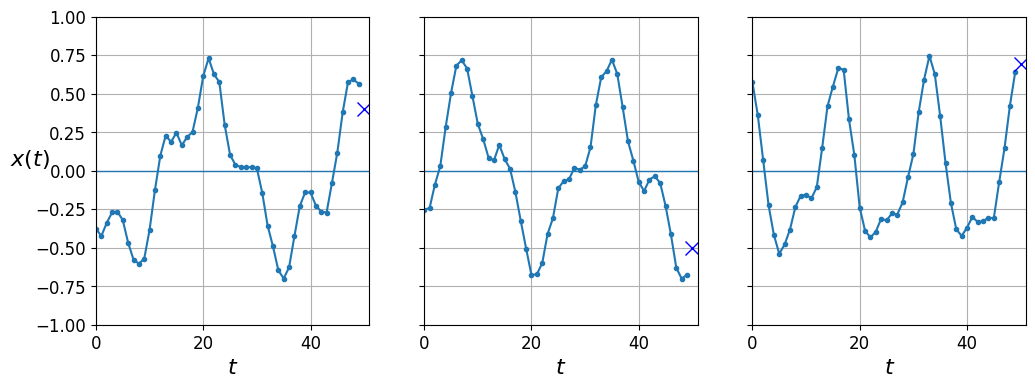

In [3]:
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
  plt.plot(series, ".-")
  if y is not None:
    plt.plot(n_steps, y, "bx", markersize=10)
  if y_pred is not None:
    plt.plot(n_steps, y_pred, "ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(X_valid[col, :, 0], y_valid[col, 0],
              y_label=("$x(t)$" if col==0 else None))
plt.show()

## Modelo 'Deep RNN'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

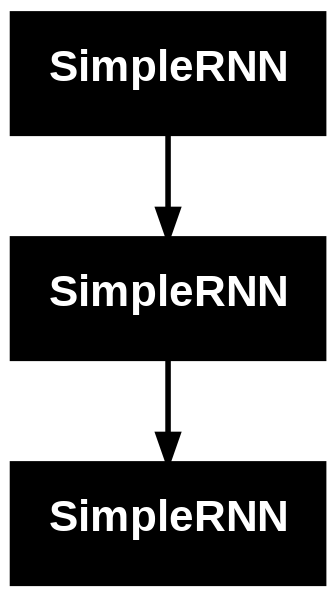

In [4]:
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)

In [5]:
for i, layer in enumerate(model.layers):
  weights = layer.get_weights()
  print(f"Layer {i+1}: {layer.name}")
  print(f"  kernel shape: {weights[0].shape}")
  print(f"  recurrent_kernel shape: {weights[1].shape}")
  print(f"  bias shape: {weights[2].shape}\n")

Layer 1: simple_rnn
  kernel shape: (1, 20)
  recurrent_kernel shape: (20, 20)
  bias shape: (20,)

Layer 2: simple_rnn_1
  kernel shape: (20, 20)
  recurrent_kernel shape: (20, 20)
  bias shape: (20,)

Layer 3: simple_rnn_2
  kernel shape: (20, 1)
  recurrent_kernel shape: (1, 1)
  bias shape: (1,)



# **EJERCICIO 3**

## ¿Qué es capa Conv1D y cómo se ajusta para modelar series de tiempo?
Es una capa de las redes neuronales que aplica filtros a lo largo de una dimensión -normalmente el tiempo- para extraer patrones locales o temporales en una secuencia.

Matemáticamente realiza una convolución discreta 1D entre un conjunto de filtros (kernels) y los valores de entrada.

Sea una serie de tiempo $X_t$, la operación de una capa Conv1D con un kernel de tamaño *k* es:

$Y_t=\sum^{k-1}_{i=0}ω_ix_{t-i}+b$

donde:
* $ω_i$: Pesos del filtro (aprendidos durante training)
* $b$: sesgo (bias)
* $Y_t$: Salida en el instante *t*

Esta ecuación se parece mucho a un modelo autorregresivo (AR), pero con la diferencia de que los pesos no se estiman con métodos estadísticos, sino mediante gradiente descendente

## Comparación


🔹 Entrenando modelo: SimpleRNN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

🔹 Entrenando modelo: LSTM
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

🔹 Entrenando modelo: GRU
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

🔹 Entrenando modelo: Conv1D


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


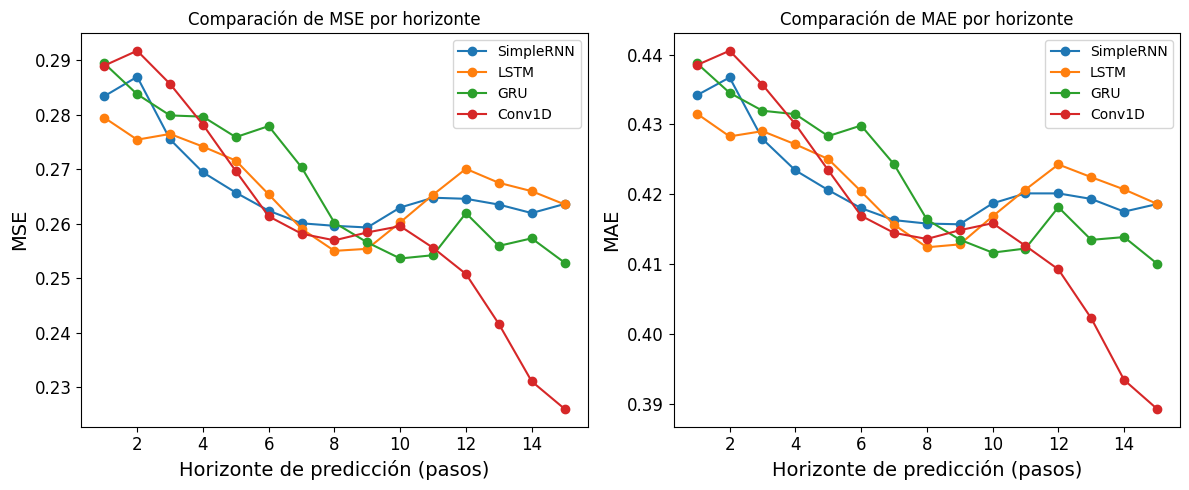

In [6]:
# -------------------------------------------------------------------
# Generador de series
# -------------------------------------------------------------------
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time   = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))   # wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)    # + noise
  return series[..., np.newaxis].astype(np.float32)

# -------------------------------------------------------------------
# Parámetros generales
# -------------------------------------------------------------------
n_steps = 50
batch_size = 10000
series = generate_time_series(batch_size, n_steps + 15)  # +15 para multihorizonte

# Particiones
X_train, y_train = series[:7000, :n_steps], series[:7000, -15:]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -15:]
X_test, y_test   = series[9000:, :n_steps], series[9000:, -15:]

# -------------------------------------------------------------------
# Función para crear modelos
# -------------------------------------------------------------------
def build_model(model_type, n_steps, horizon):
  model = keras.models.Sequential()
  if model_type == "SimpleRNN":
    model.add(keras.layers.SimpleRNN(32, return_sequences=False, input_shape=[n_steps, 1]))
  elif model_type == "LSTM":
    model.add(keras.layers.LSTM(32, return_sequences=False, input_shape=[n_steps, 1]))
  elif model_type == "GRU":
    model.add(keras.layers.GRU(32, return_sequences=False, input_shape=[n_steps, 1]))
  elif model_type == "Conv1D":
    model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=[n_steps, 1]))
    model.add(keras.layers.Flatten())
  else:
    raise ValueError("Modelo no reconocido")

  model.add(keras.layers.Dense(15))  # salida: 15 pasos de predicción
  model.compile(loss="mse", optimizer="adam", metrics=["mae"])
  return model

# -------------------------------------------------------------------
# Entrenamiento y evaluación
# -------------------------------------------------------------------
models = ["SimpleRNN", "LSTM", "GRU", "Conv1D"]
results = {m: {"mse": [], "mae": []} for m in models}

for m in models:
  print(f"\n🔹 Entrenando modelo: {m}")
  model = build_model(m, n_steps, 15)
  model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid), verbose=0)
  y_pred = model.predict(X_test)

  # Evaluar en distintos horizontes (1 a 15)
  for horizon in range(15):
    mse = np.mean((y_pred[:, horizon] - y_test[:, horizon])**2)
    mae = np.mean(np.abs(y_pred[:, horizon] - y_test[:, horizon]))
    results[m]["mse"].append(mse)
    results[m]["mae"].append(mae)

# -------------------------------------------------------------------
# Visualización de resultados
# -------------------------------------------------------------------
horizons = np.arange(1, 16)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for m in models:
  plt.plot(horizons, results[m]["mse"], marker='o', label=m)
plt.title("Comparación de MSE por horizonte")
plt.xlabel("Horizonte de predicción (pasos)")
plt.ylabel("MSE")
plt.legend()

plt.subplot(1, 2, 2)
for m in models:
  plt.plot(horizons, results[m]["mae"], marker='o', label=m)
plt.title("Comparación de MAE por horizonte")
plt.xlabel("Horizonte de predicción (pasos)")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

### Conclusiones

| Horizonte     | Mejor desempeño | Interpretación                                                   |
| ------------- | --------------- | ---------------------------------------------------------------- |
| Corto (1–5)   | LSTM / GRU      | Buen manejo de dependencias recientes                            |
| Medio (6–10)  | GRU / Conv1D    | GRU mantiene estabilidad, Conv1D empieza a capturar periodicidad |
| Largo (11–15) | Conv1D          | Detecta patrones cíclicos y reduce error notablemente            |
